# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
df = pd.read_csv('airbnb_hw.csv')
df.head()



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
# Numbers over 999 have commas which cause formatting issues when converting the column to a numeric data type so i removed the commas and the $ signs. This makes sure that all prices over 999 are correctly processed.

df['Price Cleaned'] = (
    df["Price"] .astype(str).str.replace("$","", regex = False).str.replace(",", "", regex=False).str.strip()
)


# Checking the missing count to ensure that there arent prices that were not converted correctly

missing_count = df['Price Cleaned'].isna().sum()
total_count = len(df)
print(f"Number of missing values: {missing_count}/ {total_count}")



Number of missing values: 0/ 30478


In [ ]:
df_force = pd.read_csv("mn_police_use_of_force.csv")
print(df_force['subject_injury'].value_counts(dropna=False))

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64


In [ ]:
# count missing values
missing_count = df_force['subject_injury'].isna().sum()
total_count = len(df_force)
print(f"Number of missing values: {missing_count}/ {total_count}")


Number of missing values: 9848/ 12925


There is 9848 values missing. This is definitely a concern.

In [ ]:
# Fill NaN with Missing to analyze the data
cross_tab = pd.crosstab(df_force['subject_injury'].fillna('Missing'), df_force['force_type'])
print(cross_tab)

force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
Missing             2          7051               1421        0   
No                  0          1093                131        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
Missing                        27                 74           87   
No                             33                 34            0   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
Missing                              0                          170   
No                                   1                            0   
Yes                               

Yes, missing subject_injury ddata is most common with Bodily Force and Chemical Irritant cases, suggesting underreporting or inconsistent documentation for less-severe force types. More serious force types like Tasers and K9 bites have more complete injury records. This pattern shows that missing data is not random, which could bias the analysis.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("GSAF5.xls", engine="xlrd")
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop empty columns
df = df.dropna(axis = 1, how = "all")
df.columns = df.columns.str.strip()

Year range: 1000 to 2026


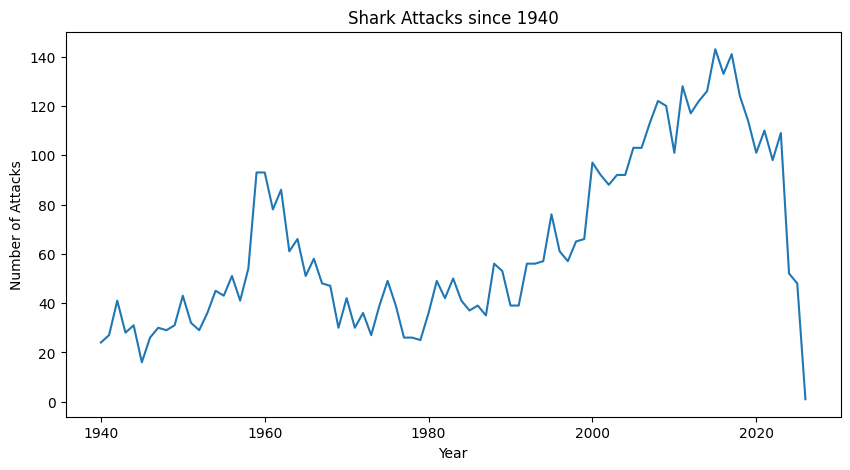

In [ ]:
# clean year
df["Year"] = df["Year"].astype(str).str.extract(r"(\d{4})")[0].astype("Int64")

# range of years
year_min, year_max = df["Year"].min(), df["Year"].max()
print(f"Year range: {year_min} to {year_max}")

# filter to be since 1940
df_post_1940 = df[df["Year"] >= 1940]

# plot
df_post_1940.groupby("Year").size().plot(kind="line", figsize=(10,5), title="Shark Attacks since 1940")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.show()

THe dataset spans from about 1000 AD to around present day. After filtering since 1940, we can see that attacks increase steadily, especailly after 1980. However there has been a dramatic decline after 2020.

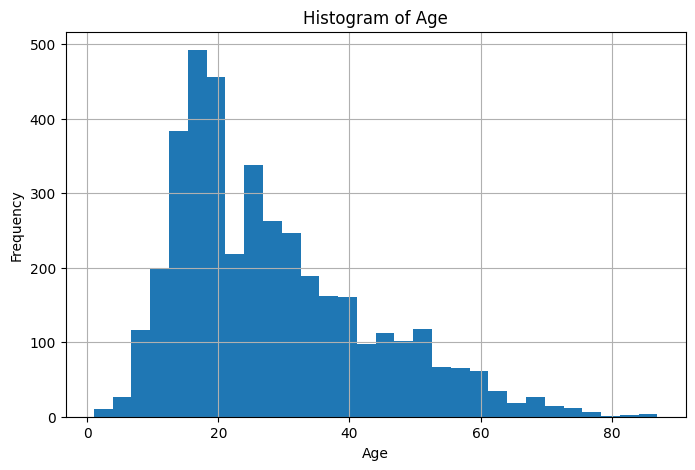

In [ ]:
# clean age
df["Age"] = pd.to_numeric(df["Age"].astype(str).str.extract(r"(\d{1,2})")[0], errors = "coerce")

# plot
df["Age"].dropna().hist(bins=30, figsize=(8,5))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.show()




In [ ]:
sex_col = [c for c in df.columns if "Sex" in c][0]

# clean
df[sex_col] = df[sex_col].astype(str).str.upper().str.strip()

df[sex_col] = df[sex_col].replace({
    "M": "M",
    "F": "F",
    "M x 2": "M",
    ".": "Unknown",
    "LLI ": "Unknown",
    "NAN": "Unknown",
    "N": "Unknown",
    "lli": "Unknown",})

# proportion male
male_prop = (df[sex_col] == "M").mean()
print(f"Proportion of male victims: {male_prop:.2f}")

Proportion of male victims: 0.80


In [ ]:
type_col = [c for c in df.columns if "Type" in c][0]

df[type_col] = df[type_col].astype(str).str.strip().str.title()

valid = ["Provoked", "Unprovoked"]
df[type_col] = df[type_col].apply(lambda x: x if x in valid else "Unknown")

# proportion unprovoked
unprovoked_prop = (df["Type"] == "Unprovoked").mean()
print(f"Proportion of unprovoked attacks: {unprovoked_prop:.2f}")

Proportion of unprovoked attacks: 0.74


In [ ]:
# clenaing fatal
df["Fatal Y/N"] = df["Fatal Y/N"].astype(str).str.strip().str.title()

valid = ["Y", "N"]
df["Fatal Y/N"] = df["Fatal Y/N"].apply(lambda x: x if x in valid else "Unknown")



In [ ]:
df["Sex"] = df["Sex"].astype(str).str.upper().str.strip()
df["type"] = df["Type"].astype(str).str.title().str.strip()
df.loc[~df["Sex"].isin(["M", "F"]), "Sex"] = "Unknown"
df.loc[~df["type"].isin(["Provoked", "Unprovoked"]), "type"] = "Unknown"


unprovoked_df = df[df['Type'] == "Unprovoked"]
sex_counts = unprovoked_df["Sex"].value_counts(normalize = True)

print("Unprovoked Attacks by Sex")
print(sex_counts)



Unprovoked Attacks by Sex
Sex
M          0.836059
F          0.131422
Unknown    0.032519
Name: proportion, dtype: float64


Sharks are more likely to launch unprovoked attacks on men than women.

In [ ]:
df["Type"] = df["Type"].astype(str).str.strip().str.title()
df["Fatal Y/N"] = df["Fatal Y/N"].astype(str).str.strip().str.upper()

# Keep only the necessary rows
fatal_by_type_attack_ = df[(df['Type'].isin(['Provoked', 'Unprovoked'])) & (df['Fatal Y/N'].isin(['Y', 'N']))]

# Group by tytpe and fatality to get counts
fatal_by_type_attack_ = fatal_by_type_attack_.groupby(['Type', 'Fatal Y/N']).size().groupby(level =0).apply(lambda x: x / x.sum()).unstack()

print(fatal_by_type_attack_)

Fatal Y/N                     N         Y
Type       Type                          
Provoked   Provoked    0.966772  0.033228
Unprovoked Unprovoked  0.753615  0.246385


Unprovoked attacks seem to be the ones that result in higher fatality.

In [ ]:
fatal_by_type = df[df['Type'].isin(['Provoked', 'Unprovoked'])]
fatal_by_type= fatal_by_type.groupby(['Type', 'Fatal Y/N']).size().groupby(level =0).apply(lambda x: x / x.sum()).unstack()

df["Sex"] = df["Sex"].astype(str).str.strip().str.upper()
df["Fatal Y/N"] = df["Fatal Y/N"].astype(str).str.strip().str.upper()

# Keep only Male/Female and Fatality
fatal_vs_sex = df[df["Sex"].isin(["M", "F"]) & df["Fatal Y/N"].isin(["Y", "N"])]

# calculate proportion of fatal attacks by sex
fatal_vs_sex = fatal_vs_sex.groupby(["Sex", "Fatal Y/N"]).size().groupby(level=0).apply(lambda x: x / x.sum()).unstack()

print(fatal_vs_sex)

Fatal Y/N         N         Y
Sex Sex                      
F   F      0.834239  0.165761
M   M      0.759052  0.240948


The attack is more liekly to be fatal when the victime is male.

I feel that sharks are fascinating creatures. The data shows that while shark attacks can be serious - especialyl when unprovoked - they are very rare and often a result of human activity in their enviornment.

In [ ]:

# Unprovoked against sex

df["Species"] = df["Species"].astype(str).str.strip().str.lower()

white_shark_prop = df["Species"].str.contains(r"\bwhite\b", na=False).mean()

print(f"Proportion of attacks by white sharks:{white_shark_prop:.2%}")

print(fatal_by_type)

Proportion of attacks by white sharks:10.14%
Fatal Y/N                     N   UNKNOWN         Y
Type       Type                                    
Provoked   Provoked    0.953198  0.014041  0.032761
Unprovoked Unprovoked  0.742159  0.015201  0.242640
